In [10]:
from scipy.misc import imread, imresize, imsave
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from random import shuffle
import pickle
from collections import Counter

In [2]:
def create_train_dataset(path, labels):
    dataset = []
    ind = 0
    
    for img in tqdm(os.listdir(path)):
        if '.png' in img:
            abs_path = os.path.join(path, img)
            img_pixels = imread(abs_path)
            flat_img = img_pixels.flatten()
            dataset.append([flat_img, labels[ind]])
            ind += 1
        
        shuffle(dataset)
        np.save('train_data.npy', dataset)
    return dataset

In [ ]:
# code for reading image files into numpy arrays
assignment_path = "../cs231n/datasets/"

labels_path = os.path.join(assignment_path, 'trainLabels.csv')
labels = pd.read_csv(labels_path, index_col=None)

dataset = create_train_dataset('../cs231n/datasets/train', labels['label'])

In [4]:
class NearestNeighbor(object):
    ''' Nearest Neighbor class definition'''
    
    def __init__(self):
        self.X = None
        self.Y = None
    
    def train(self, train_x, train_y):
        self.X = train_x
        self.Y = train_y
        
    def predict(self, X):
        test = X.shape[0]
        Y_pred = np.zeros(test, dtype=self.Y.dtype)
        
        for i in tqdm(range(test)):
            distance = np.sum(np.abs(self.X - X[i, :]), axis=1)
            min_index = np.argmin(distance)
            Y_pred[i] = self.Y[min_index]
            #print(i)
        
        return Y_pred

In [5]:
def unpickle_file(file):
    '''unpickling CIFAR-10 datset files downloaded from http://www.cs.toronto.edu/~kriz/cifar.html'''
    
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
    
    #print(data.keys())
    images = data[b'data']
    labels = data[b'labels']
    
    return np.array(images), np.array(labels)
    

In [6]:
def load_training_data(path):
    
    '''loading training dataset from pickle files'''
    
    trainX = []
    trainY = []
    
    for batch in tqdm(os.listdir(path)):
        if 'data' in batch:
            file_path = os.path.join(path, batch)
            data, labels = unpickle_file(file_path)
            trainX.extend(data)
            trainY.extend(labels)
        
    return np.array(trainX), np.array(trainY)

In [7]:
def load_test_data(path):
    
    '''loading test data from pickle files'''
    
    testX = []
    testY = []
    
    for batch in tqdm(os.listdir(path)):
        if 'test' in batch:
            file_path = os.path.join(path, batch)
            data, labels = unpickle_file(file_path)
            testX.extend(data)
            testY.extend(labels)
        
    return np.array(testX), np.array(testY)

In [8]:
trainX, trainY = load_training_data(r"E:\deep learning\cs231n_ak\assignment1\cs231n\datasets\cifar-10-batches-py")
testX, testY = load_test_data(r"E:\deep learning\cs231n_ak\assignment1\cs231n\datasets\cifar-10-batches-py")

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.98it/s]


In [9]:
nn = NearestNeighbor()
nn.train(trainX, trainY)
pred = nn.predict(testX[:1000, :])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [12:11<00:00,  1.37it/s]


In [11]:
np.mean(pred == testY[:1000])

0.253

In [14]:
class kNearestNeighbors(NearestNeighbor):
    
    '''definition of kNN by inheriting from NearestNeighbor class'''
    
    def __init__(self):
        super().__init__()
        
    def _get_major_vote(self, ind):
        
        max_labels = self.Y[ind]
        count_labels = Counter(max_labels)
        max_vote = 0
        max_label = None
        
        for label, count  in count_labels.items():
            if count > max_vote:
                max_label = label
                max_vote = count
        
        return max_label
    
    def predict(self, X, k):
        
        test = X.shape[0]
        Y_pred = np.zeros(test, dtype=self.Y.dtype)
        
        for i in tqdm(range(test)):
            distance = np.sum(np.abs(self.X - X[i, :]), axis=1)
            min_indices = np.argsort(distance)[:k]
            major_vote = self._get_major_vote(min_indices)
            Y_pred[i] = self.Y[major_vote]
        
        return Y_pred

In [15]:
knn = kNearestNeighbors()

In [16]:
knn.train(trainX, trainY)

In [17]:
knn_preds = knn.predict(testX[: 500], 3)
np.mean(knn_preds == testY[:500])

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:02<00:00,  1.38it/s]


0.11799999999999999

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:51<00:26,  1.28it/s]


 32%|█████████████████████████▉                                                       | 32/100 [00:26<00:55,  1.22it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:14<00:00,  1.34it/s]


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:42<00:21,  1.55it/s]


 32%|█████████████████████████▉                                                       | 32/100 [00:25<00:53,  1.27it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.43it/s]


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:45<00:23,  1.45it/s]


 32%|█████████████████████████▉                                                       | 32/100 [00:22<00:46,  1.45it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:10<00:00,  1.43it/s]


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:48<00:25,  1.35it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [08:32<00:00, 73.16s/it]


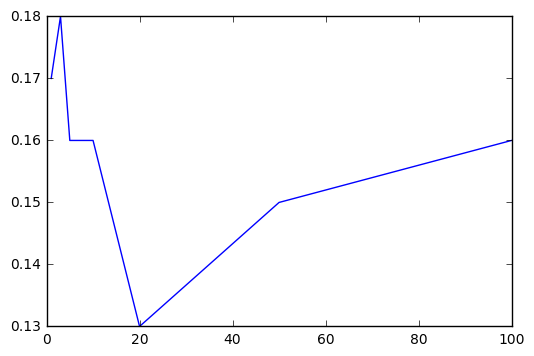

In [18]:
# validation on test set for better k value (Bad Idea)

validation_accuracies = []

for k in tqdm([1, 3, 5, 10, 20, 50, 100]):
    
    knn_preds = knn.predict(testX[:100], k)
    accuracy = np.mean(knn_preds == testY[:100])
    validation_accuracies.append((k, accuracy))

validation_accuracies = np.array(validation_accuracies)
plt.plot(validation_accuracies[:, :1], validation_accuracies[:, 1:])
plt.show()

In [19]:
print(validation_accuracies)

[[   1.      0.17]
 [   3.      0.18]
 [   5.      0.16]
 [  10.      0.16]
 [  20.      0.13]
 [  50.      0.15]
 [ 100.      0.16]]


100%|███████████████████████████████████████████████████████████████████████████████| 333/333 [00:02<00:00, 112.81it/s]


[0.11411411411411411, 0.14114114114114115, 0.093093093093093091]


100%|███████████████████████████████████████████████████████████████████████████████| 333/333 [00:02<00:00, 113.47it/s]


[0.11411411411411411, 0.14114114114114115, 0.096096096096096095]


100%|████████████████████████████████████████████████████████████████████████████████| 333/333 [00:03<00:00, 83.44it/s]


[0.1021021021021021, 0.13213213213213212, 0.0990990990990991]


100%|███████████████████████████████████████████████████████████████████████████████| 333/333 [00:02<00:00, 112.17it/s]


[0.0990990990990991, 0.12312312312312312, 0.12012012012012012]


100%|███████████████████████████████████████████████████████████████████████████████| 333/333 [00:02<00:00, 112.97it/s]


[0.1111111111111111, 0.13213213213213212, 0.12912912912912913]


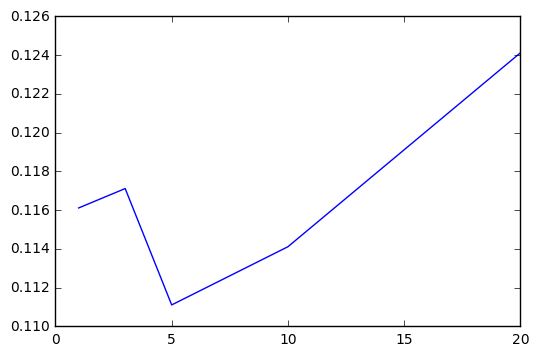

In [36]:
# 3-fold cross validation for k value

trainX_batch = trainX[:1000, :]
trainY_batch = trainY[:1000]

folds = 3
fold_size = trainX_batch.shape[0] // folds
cross_validation_acc = []

for k in [1, 3, 5, 10, 20]:
    
    fold_accuracies = []
    knn = kNearestNeighbors()
    fold_start = 0
    fold_end = fold_size

    for fold in range(folds):

        test_fold_x = trainX_batch[fold_start:fold_end, :]
        test_fold_y = trainY_batch[fold_start:fold_end]

        train_fold_x = np.vstack((trainX_batch[:fold_start, :], trainX_batch[fold_end:, :]))
        train_fold_y = np.hstack((trainY_batch[:fold_start], trainY_batch[fold_end: ]))

        knn.train(train_fold_x, train_fold_y)

        pred_y = knn.predict(test_fold_x, k)
        accuracy = np.mean(pred_y == test_fold_y)
        fold_accuracies.append(accuracy)
        
        fold_start += fold_size
        fold_end += fold_size
    
    print(fold_accuracies)
    cross_validation_acc.append((k, np.mean(fold_accuracies)))

cross_validation_acc = np.array(cross_validation_acc)
plt.plot(cross_validation_acc[:, :1], cross_validation_acc[:, 1:], 'o')
plt.show()

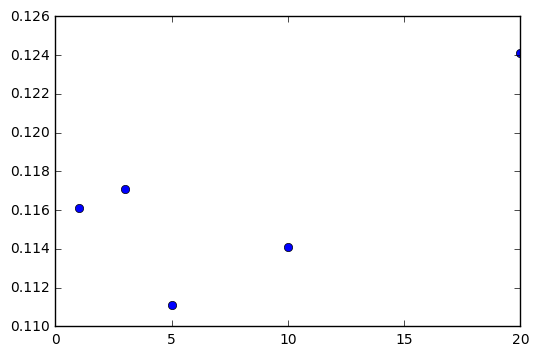

In [38]:
plt.plot(cross_validation_acc[:, :1], cross_validation_acc[:, 1:], 'o')
plt.show()